In [2]:
!uv pip install langgraph


Using Python 3.10.16 environment at: env
Audited 1 package in 2ms


In [11]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [7]:
# define state

In [15]:
class BMISTATE(TypedDict):
    weight_kg : float
    height_cm : float
    bmi : float
    category : str





In [9]:
def calculate_bmi(state: BMISTATE) -> BMISTATE:
    weight = state["weight_kg"] 
    height = state["height_cm"] 
    bmi = weight / (height / 100) ** 2
    state["bmi"] = round(bmi,2)
    return state


In [16]:
def get_category(state: BMISTATE) -> BMISTATE:
    bmi = state["bmi"]
    if bmi < 18.5:
        state["category"] = "Underweight"
    elif bmi < 24.9:
        state["category"] = "Normal weight"
    return state

In [17]:
# define graph
graph = StateGraph(BMISTATE)
# add nodes 
graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("label_category", get_category)
# add edges 
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", "label_category")
graph.add_edge("label_category", END)

# complile the graph
workflow =  graph.compile()
#execute the graph


In [19]:
workflow.invoke({"weight_kg": 70, "height_cm": 170})


{'weight_kg': 70, 'height_cm': 170, 'bmi': 24.22, 'category': 'Normal weight'}

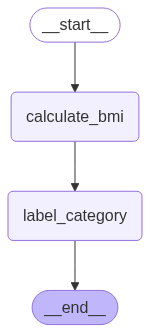

In [18]:
from IPython.display import Image, display

display(Image(workflow.get_graph().draw_mermaid_png()))